The CIFAR-10 data consists of 60,000 32x32 color images in 10 classes, with 6000 images per class. There are 50,000 training images and 10,000 test images in the official data.
The label classes in the dataset are:

 - airplane 
 - automobile 
 - bird 
 - cat 
 - deer 
 - dog 
 - frog 
 - horse 
 - ship 
 - truck

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

<img src="files/capture2.png">

The basic steps in the project:
 - Image Preprocessing
              - OpenCV, 
              - PIL, 
              - Scikit-Image
              - Numpy and matplotlib
 - Modelling and Prediction
              - Keras
              - TensorFlow
 - Cross-Validation, model selection and performance improvement
              - Scikit Learn

Image Preprocessing
1. Load the data, what does it represent??
2. Check the shape, sample, min, maximum, mean and standard deviation
2. EDA :- using PIL, matplotlib, Opencv
3. aspect ratio, Scaling, same resolution, normalize inputs
4. Reduce Dimensions
5. Data Augmentation
6. Image Segmentation
7. Zero centering images

<img src="files/capture.png">

In [1]:
import os, numpy, cv2, PIL
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

In [2]:
trainlabs = pd.read_csv("~\Downloads\\trainLabels.csv")
imagepath = "C:\\Users\\Neha\\train"
##Reading in Image Data
def get_imlist(path):
    return[os.path.join(path,f) for f in os.listdir(path) if f.endswith('.png')]
images = get_imlist('C:\\Users\\Neha\\train')
images
images = sorted(images)
type(images)

list

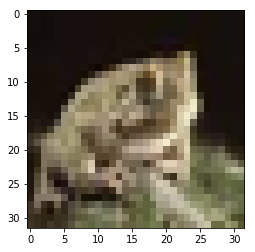

In [3]:
####Sample
%matplotlib inline
img = mpimg.imread(images[6])
plt.imshow(img)

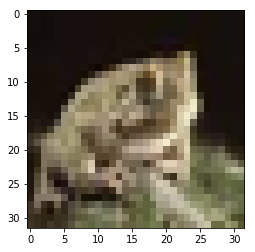

In [4]:
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [5]:
type(img)
img.shape

(32, 32, 3)

Since the image is a square, no need to make it one!!

In [6]:
p = img.transpose(1,0)
plt.imshow(p)
img = (img-254)/(254-100)
plt.imshow(img)

ValueError: axes don't match array

In [7]:
print("shape of image: {}".format(img.shape))
print("dtype of image: {}".format(img.dtype))

shape of image: (32, 32, 3)
dtype of image: float32


In [8]:
trainlabs.head(n=5)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [9]:
images

['C:\\Users\\Neha\\train\\1.png',
 'C:\\Users\\Neha\\train\\10.png',
 'C:\\Users\\Neha\\train\\100.png',
 'C:\\Users\\Neha\\train\\1000.png',
 'C:\\Users\\Neha\\train\\10000.png',
 'C:\\Users\\Neha\\train\\10001.png',
 'C:\\Users\\Neha\\train\\10002.png',
 'C:\\Users\\Neha\\train\\10003.png',
 'C:\\Users\\Neha\\train\\10004.png',
 'C:\\Users\\Neha\\train\\10005.png',
 'C:\\Users\\Neha\\train\\10006.png',
 'C:\\Users\\Neha\\train\\10007.png',
 'C:\\Users\\Neha\\train\\10008.png',
 'C:\\Users\\Neha\\train\\10009.png',
 'C:\\Users\\Neha\\train\\1001.png',
 'C:\\Users\\Neha\\train\\10010.png',
 'C:\\Users\\Neha\\train\\10011.png',
 'C:\\Users\\Neha\\train\\10012.png',
 'C:\\Users\\Neha\\train\\10013.png',
 'C:\\Users\\Neha\\train\\10014.png',
 'C:\\Users\\Neha\\train\\10015.png',
 'C:\\Users\\Neha\\train\\10016.png',
 'C:\\Users\\Neha\\train\\10017.png',
 'C:\\Users\\Neha\\train\\10018.png',
 'C:\\Users\\Neha\\train\\10019.png',
 'C:\\Users\\Neha\\train\\1002.png',
 'C:\\Users\\Neha\\train

In [10]:
type(trainlabs)

pandas.core.frame.DataFrame

In [11]:
type(images[0])

str

In [12]:
trainlabs.columns

Index(['id', 'label'], dtype='object')

In [13]:
strn = '.png'

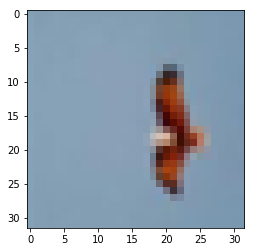

In [14]:
trainlabs['path'] = trainlabs['id'].astype(str) + strn
type(trainlabs.iloc[0]["id"])
trainlabs.head(n=10)
%matplotlib inline
img = mpimg.imread(imagepath + '\\' + trainlabs.iloc[1009]["path"])
plt.imshow(img)

In [15]:
type(img)
img.shape

(32, 32, 3)

In [16]:
type(trainlabs["path"])

pandas.core.series.Series

In [17]:
import numpy as np
np.amin(img), np.amax(img)

(0.0078431377, 0.84705883)

In [18]:
np.mean(img)

0.58663064

In [19]:
np.std(img)

0.12372432

In [20]:
normimg = abs(img - np.mean(img))/np.std(img)
meanimg = abs(img - np.mean(img))
stdimg = img/np.std(img)

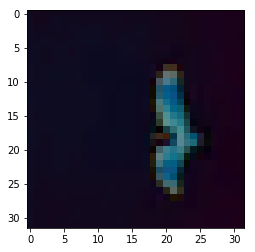

In [21]:
plt.imshow(meanimg, cmap=plt.cm.gray)

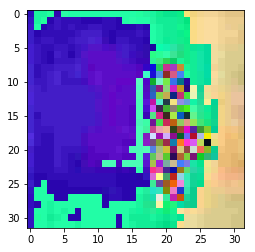

In [22]:
plt.imshow(stdimg, cmap=plt.cm.gray)

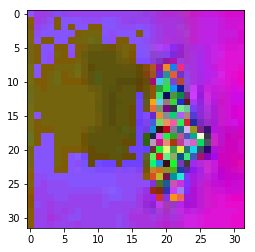

In [23]:
plt.imshow(normimg)

In [24]:
arr=numpy.zeros((32,32,3),numpy.float)

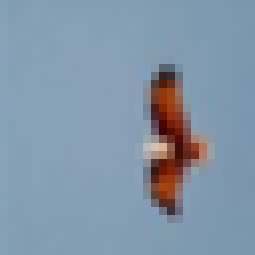

In [25]:
from PIL import Image
pil_im = Image.open(imagepath + '\\' + trainlabs.iloc[1009]["path"])
pil_im.convert('L')
pil_im.resize((255,255))

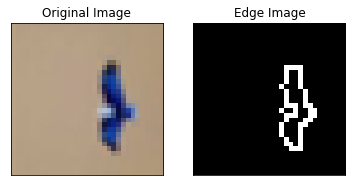

In [27]:
%matplotlib inline
img = cv2.imread(imagepath + '\\' + trainlabs.iloc[1009]["path"])
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

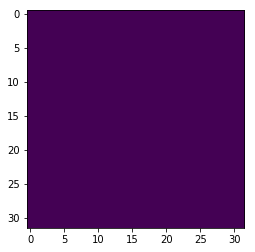

In [28]:
%matplotlib inline
img = cv2.imread(imagepath + '\\' + trainlabs.iloc[1009]["path"])
imgs = np.uint8(img)
fgbg = cv2.createBackgroundSubtractorMOG2()
fgmask = fgbg.apply(imgs)
plt.imshow(fgmask)

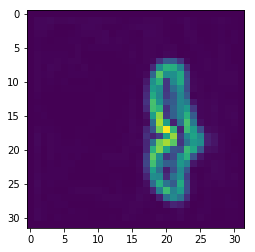

In [29]:
from skimage import io as skio
from skimage import filters
from skimage import color
img = color.rgb2gray(skio.imread(imagepath + '\\' + trainlabs.iloc[1009]["path"]))
sobel = filters.sobel(img)
plt.imshow(sobel)

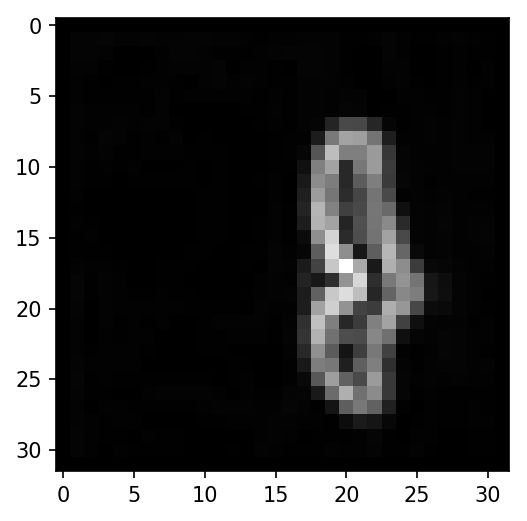

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 150
plt.imshow(sobel)

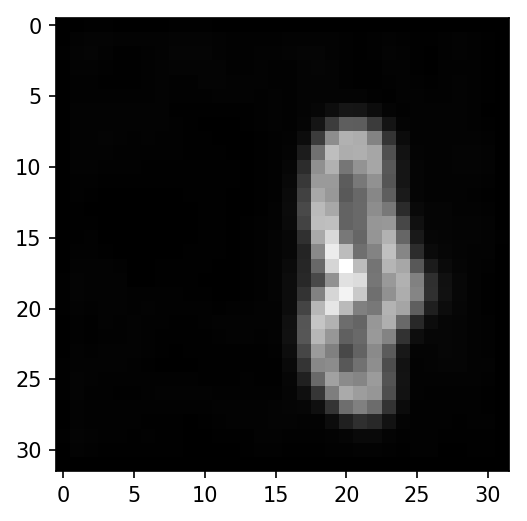

In [31]:
blurred = filters.gaussian(sobel, sigma=0.65)
plt.imshow(blurred)

In [32]:
light_spots = np.array((img > 0.69).nonzero()).T
light_spots.shape

(3, 2)

Text(0.5,1,'light spots in image')

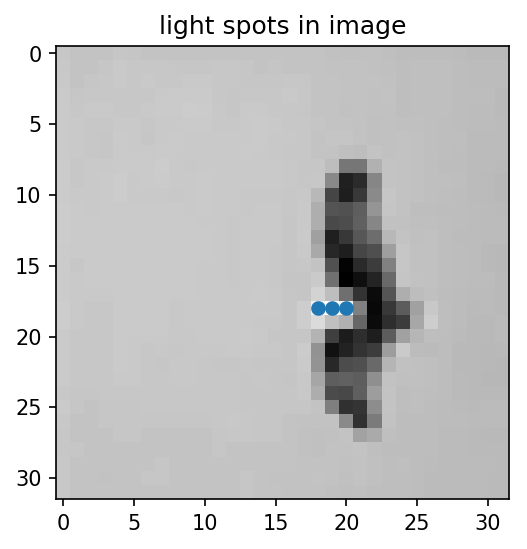

In [33]:
plt.plot(light_spots[:, 1], light_spots[:, 0], 'o')
plt.imshow(img)
plt.title('light spots in image')

Text(0.5,1,'dark spots in image')

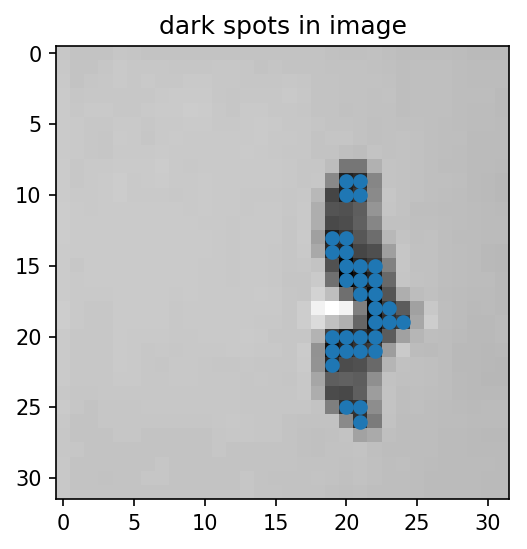

In [34]:
dark_spots = np.array((img < 0.250).nonzero()).T
dark_spots.shape
plt.plot(dark_spots[:, 1], dark_spots[:, 0], 'o')
plt.imshow(img)
plt.title('dark spots in image')

In [35]:
import numpy as np
from scipy import ndimage as ndi
bool_mask = numpy.zeros((32,32),numpy.float)
bool_mask[tuple(light_spots.T)] = True
bool_mask[tuple(dark_spots.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)
num_seeds

4

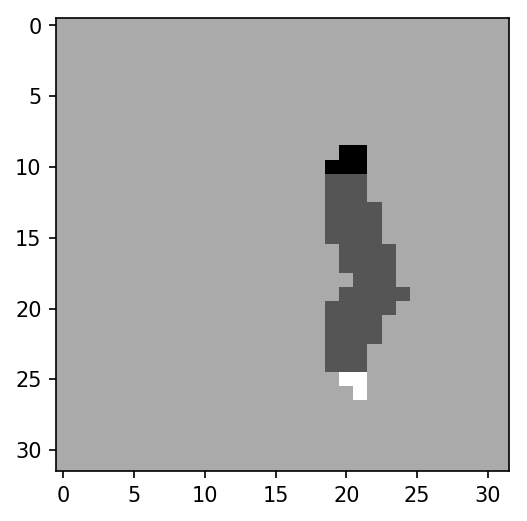

In [36]:
from skimage import morphology
ws = morphology.watershed(blurred, seed_mask)
plt.imshow(ws)

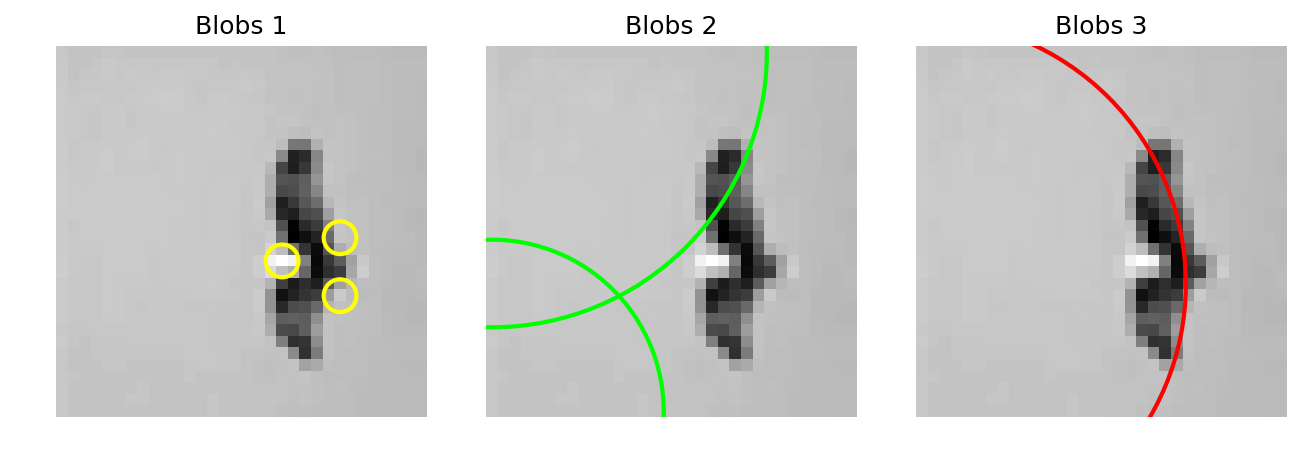

In [40]:
image = img
image_gray = rgb2gray(img)
blobs_log = blob_log(image_gray, max_sigma=40, num_sigma=20, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=50, threshold=.15)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=50, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]
colors = ['yellow', 'lime', 'red']
titles = ['Blobs 1', 'Blobs 2',
          'Blobs 3']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [120]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
 
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [144]:
from sklearn.model_selection import train_test_split
batch_size = 500
train_size = 0.8
one_hot_trainlabs = pd.get_dummies(data=trainlabs, columns=['label'])
one_hot_trainlabs.head(n=5)

,id,path,label_airplane,label_automobile,label_bird,label_cat,label_deer,label_dog,label_frog,label_horse,label_ship,label_truck
0,1,1.png,0,0,0,0,0,0,1,0,0,0
1,2,2.png,0,0,0,0,0,0,0,0,0,1
2,3,3.png,0,0,0,0,0,0,0,0,0,1
3,4,4.png,0,0,0,0,1,0,0,0,0,0
4,5,5.png,0,1,0,0,0,0,0,0,0,0


In [143]:
def batch(batch_size):
    num_images = len(images)
    idx= np.random.choice(num_images, size = batch_size, replace=False)
    batch = one_hot_trainlabs.iloc[idx]
    train, test = train_test_split(batch, test_size=0.2)
    return train, test
train, test = batch(500)
train.head(n=5)

,id,path,label_airplane,label_automobile,label_bird,label_cat,label_deer,label_dog,label_frog,label_horse,label_ship,label_truck
34358,34359,34359.png,0,1,0,0,0,0,0,0,0,0
34586,34587,34587.png,0,0,0,0,0,0,0,0,0,1
12045,12046,12046.png,0,0,0,1,0,0,0,0,0,0
21050,21051,21051.png,0,0,0,0,0,0,0,0,1,0
9875,9876,9876.png,0,0,0,0,0,1,0,0,0,0


In [137]:
train_images_path =  imagepath + '\\' + train["path"]
test_images_path = imagepath + '\\' + test["path"]

In [148]:
train_images_list = train_images_path.tolist()
test_images_list = test_images_path.tolist()
train_images = [] 
test_images = []
for im in train_images_list:
        train_image = cv2.imread(im) 
        train_images.append(train_image)
for im in test_images_list:
        test_image = cv2.imread(im) 
        test_images.append(test_image)
type(test_images)

list

In [149]:
train_data = np.array(train_images)
train_labels_one_hot = train.iloc[:,2:12]
test_data = np.array(test_images)
test_labels_one_hot = test.iloc[:,2:12]


In [151]:
input_shape = (32,32,3)
nClasses = 10
model1 = createModel()
epochs = 100
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
history = model1.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
 
model1.evaluate(test_data, test_labels_one_hot)

Train on 400 samples, validate on 100 samples
Epoch 1/100
400/400 [==============================] - 6s 16ms/step - loss: 13.1150 - acc: 0.0925 - val_loss: 11.4834 - val_acc: 0.0900
Epoch 2/100
400/400 [==============================] - 4s 10ms/step - loss: 13.4779 - acc: 0.0950 - val_loss: 11.0512 - val_acc: 0.1400
Epoch 3/100
400/400 [==============================] - 4s 9ms/step - loss: 12.9455 - acc: 0.1050 - val_loss: 3.6860 - val_acc: 0.0800
Epoch 4/100
400/400 [==============================] - 4s 9ms/step - loss: 7.6715 - acc: 0.0650 - val_loss: 2.5074 - val_acc: 0.0800
Epoch 5/100
400/400 [==============================] - 4s 9ms/step - loss: 3.2016 - acc: 0.0850 - val_loss: 2.2887 - val_acc: 0.0900
Epoch 6/100
400/400 [==============================] - 4s 9ms/step - loss: 2.3888 - acc: 0.0975 - val_loss: 2.2843 - val_acc: 0.1600
Epoch 7/100
400/400 [==============================] - 4s 10ms/step - loss: 2.3462 - acc: 0.0750 - val_loss: 2.2874 - val_acc: 0.1300
Epoch 8/100
400

Epoch 62/100
400/400 [==============================] - 4s 9ms/step - loss: 2.3752 - acc: 0.1375 - val_loss: 2.3323 - val_acc: 0.1200
Epoch 63/100
400/400 [==============================] - 4s 9ms/step - loss: 2.2684 - acc: 0.1300 - val_loss: 2.3013 - val_acc: 0.1100
Epoch 64/100
400/400 [==============================] - 4s 10ms/step - loss: 2.2446 - acc: 0.1550 - val_loss: 2.3020 - val_acc: 0.1800
Epoch 65/100
400/400 [==============================] - 4s 10ms/step - loss: 2.2043 - acc: 0.1950 - val_loss: 2.3176 - val_acc: 0.1600
Epoch 66/100
400/400 [==============================] - 4s 10ms/step - loss: 2.2055 - acc: 0.1725 - val_loss: 2.3112 - val_acc: 0.1800
Epoch 67/100
400/400 [==============================] - 4s 9ms/step - loss: 2.1845 - acc: 0.1650 - val_loss: 2.3469 - val_acc: 0.1400
Epoch 68/100
400/400 [==============================] - 4s 9ms/step - loss: 2.2518 - acc: 0.1575 - val_loss: 2.2999 - val_acc: 0.1200
Epoch 69/100
400/400 [==============================] - 4s 

[2.4259804916381835, 0.14000000000000001]

Text(0.5,1,'Accuracy Curves')

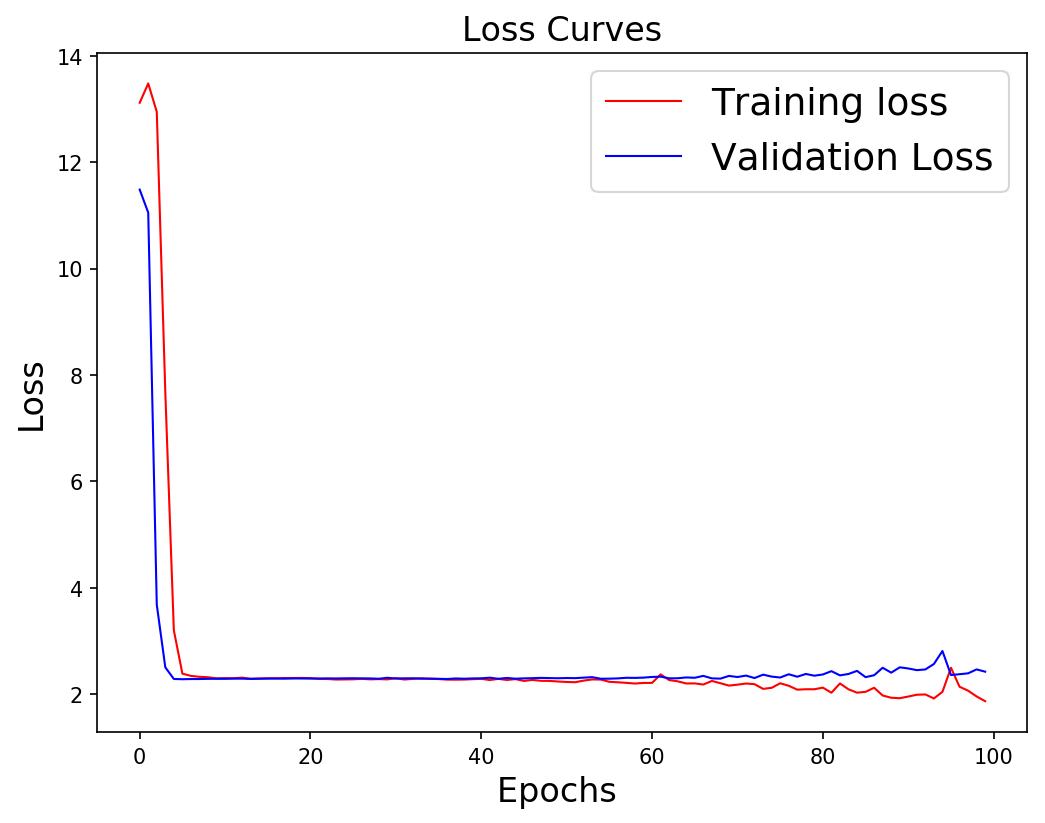

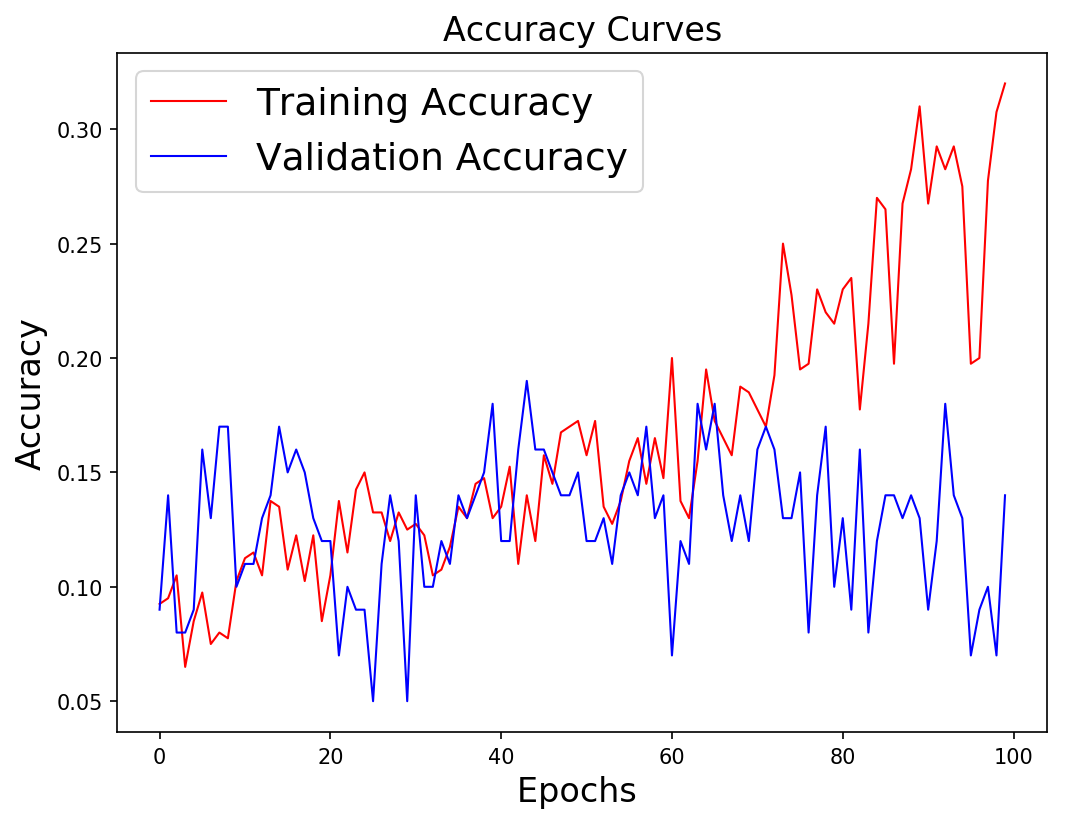

In [173]:
# Loss Curves
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'],'r',linewidth=1.0)
plt.plot(history.history['val_loss'],'b',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[6,4])
plt.plot(history.history['acc'],'r',linewidth=1.0)
plt.plot(history.history['val_acc'],'b',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)


In [170]:
from keras.preprocessing.image import ImageDataGenerator
 
model2 = createModel()
 
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
batch_size = 256
epochs = 100
datagen = ImageDataGenerator(
#         zoom_range=0.2, # randomly zoom into images
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
 
# Fit the model on the batches generated by datagen.flow().
history2 = model2.fit_generator(datagen.flow(train_data, train_labels_one_hot, batch_size=batch_size),
                              steps_per_epoch=int(np.ceil(train_data.shape[0] / float(batch_size))),
                              epochs=epochs,
                              validation_data=(test_data, test_labels_one_hot),
                              workers=4)
 
model2.evaluate(test_data, test_labels_one_hot)

Epoch 1/100
2/2 [==============================] - 5s 2s/step - loss: 13.1972 - acc: 0.0858 - val_loss: 7.5209 - val_acc: 0.1000
Epoch 2/100
2/2 [==============================] - 4s 2s/step - loss: 8.1733 - acc: 0.0997 - val_loss: 2.3147 - val_acc: 0.1500
Epoch 3/100
2/2 [==============================] - 4s 2s/step - loss: 2.5549 - acc: 0.1060 - val_loss: 2.2957 - val_acc: 0.1000
Epoch 4/100
2/2 [==============================] - 4s 2s/step - loss: 2.3322 - acc: 0.0964 - val_loss: 2.2988 - val_acc: 0.1100
Epoch 5/100
2/2 [==============================] - 4s 2s/step - loss: 2.3445 - acc: 0.1027 - val_loss: 2.2956 - val_acc: 0.1400
Epoch 6/100
2/2 [==============================] - 4s 2s/step - loss: 2.3207 - acc: 0.0984 - val_loss: 2.3021 - val_acc: 0.1200
Epoch 7/100
2/2 [==============================] - 4s 2s/step - loss: 2.3318 - acc: 0.0921 - val_loss: 2.2973 - val_acc: 0.1300
Epoch 8/100
2/2 [==============================] - 4s 2s/step - loss: 2.3138 - acc: 0.1239 - val_loss: 

[2.2792238998413086, 0.17999999999999999]

In [33]:
# Loss Curves
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[6,4])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

NameError: name 'history' is not defined